#MSPA PREDICT 400

##Discussion Topic: Week 4 Game Applications

###Introduction

This document presents the results of the fourth weeks discussion topic for the Masters of Science in Predictive Analytics course: PREDICT 400. This assessment required the student to think of any casino/board/card game and the probabilities of two or more specific events in that game, and to discuss whether/why these events were independent or dependent.

###Two-up

Two-up is a traditional Australian gambling game, involving a designated "spinner" tossing two coins in the air. Players gamble on whether both of the coins will fall heads, or both will fall tails. The house maintains an advantage by collecting all bets if five odds (a head and tail combination) is thrown five times in a row. For further information on the game, see <a href = "https://en.wikipedia.org/wiki/Two-up">here</a>.

For this assessment, I demonstrate basic probabilities of coin tosses, conjuntive probabilities of multiple coin tosses, and explain the link between these results and the 'Gamber's Fallacy'.

####Coin Toss Sampling

With a coin flip, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely. Each event in this sequence is independent, as the outcome of the first flip won't have an impact on the outcome of the last flip.

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def toss():
    return random.randint(1, 2)

Histogram of outcomes from tossing a coin two times (1 = heads, 2 = tails):

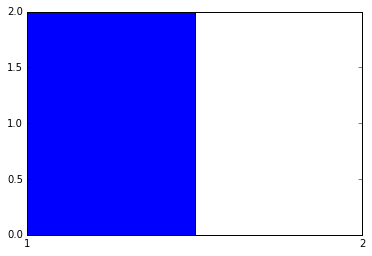

In [10]:
import numpy as np

random.seed(1)
two_sample = [toss() for _ in range(2)]

plt.hist(two_sample, 2)
plt.xlim(xmin = 1, xmax = 2)
plt.xticks(np.arange(1, 2+1, 1))
plt.show()

Histogram of outcomes from tossing a coin 10 times (1 = heads, 2 = tails):

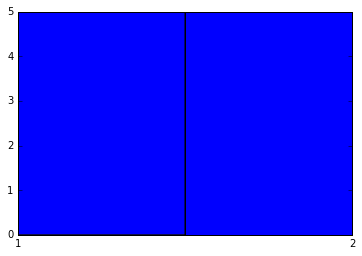

In [20]:
import numpy as np

random.seed(1)
ten_sample = [toss() for _ in range(10)]

plt.hist(ten_sample, 2)
plt.xlim(xmin = 1, xmax = 2)
plt.xticks(np.arange(1, 2+1, 1))
plt.show()

Histogram of outcomes from tossing a coin 100 times (1 = heads, 2 = tails):

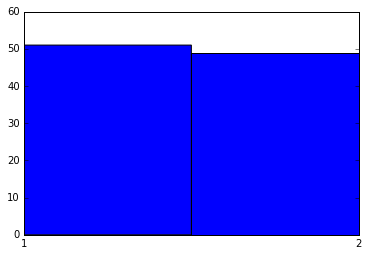

In [12]:
random.seed(5)
hundred_sample = [toss() for _ in range(100)]

plt.hist(hundred_sample, 2)
plt.xlim(xmin = 1, xmax = 2)
plt.xticks(np.arange(1, 2+1, 1))
plt.show()

With the fair coin shown in the examples above, the outcomes of the tosses are statistically independent, with the probability of a heads/or tails result being 50%.

####Conjunctive Probability with a Fair Coin

Let's say we want to find the probability that from five coin tosses, a coin will come up heads every time. This is called a conjunctive probability, because it involves a sequence of events. We want to the find the probability that the first toss is heads and the second toss is heads, and so on.

All we have to do to compute the probability of this sequence is multiply the individual probabilities of each event out. This is `.5 * .5 * .5 * .5 * .5`, which equals .03125, giving us a 3.125% chance that all 5 coin toss result in heads.

Find the probability that two tosses in a row will all turn out heads.

In [13]:
two_heads = .5 * .5
print("two_heads:", two_heads)

two_heads: 0.25


Find the probability that 10 tosses in a row will all turn out heads.

In [14]:
ten_heads = .5 ** 10
print("ten_heads:", ten_heads)

ten_heads: 0.0009765625


Find the probability that 100 tossess in a row will all turn out heads.

In [15]:
hundred_heads = .5 ** 100
print("hundred_heads:", hundred_heads)

hundred_heads: 7.888609052210118e-31


Likewise, we can find the inverse of each of these probabilities.

Find the probability that at least one of the first two tossess comes up heads.

In [16]:
two_heads = .5 * .5
or_two_heads = 1 - two_heads

print("or_two_heads:", or_two_heads)

or_two_heads: 0.75


Find the probability that at least one of the first 10 tossess comes up heads.

In [17]:
ten_heads = .5 ** 10
or_ten_heads = 1 - ten_heads

print("or_ten_heads:", or_ten_heads)

or_ten_heads: 0.9990234375


Find the probability that at least one of the first 100 tossess comes up heads.

In [18]:
hundred_heads = .5 ** 100
or_hundred_heads = 1 - hundred_heads

print("or_hundred_heads:", or_hundred_heads)

or_hundred_heads: 1.0


####Gamber's Fallacy

However, there is a risk of falling into the <a href = "https://en.wikipedia.org/wiki/Gambler's_fallacy">gamber's fallacy</a> trap when looking at conjuctive probabilities for coin tosses.

Suppose nine coin tosses have all resulted in heads. A gambler may see the chance of the tenth coin toss resulting in heads as 'the probability of 10 tosses in a row all turning out heads', (which is equal to 0.0009765625). However, this is not correct, instead the probability of the tenth coin toss resulting in heads remains 0.5.

'The probability of 10 tosses in a row all turning out heads' is 0.0009765625 only BEFORE the 10 coins are tossed. After any of the coins are tossed, their result becomes known and its probability become equal to one. i.e. on the tenth coin toss, with all tossess resulting in heads, the probability of the next toss resulting in heads is 1 * 1 * 1 * 1 * 1 * 1 * 1 * 1 * 1 * 0.5 = 0.5.